# Measure Stations 

Currently there are 4 subclasses which inherit and extend the functionality of the base `station` class, which are `RiverLevel` , `RiverFlow`, `TidalLevel` and `Temperature`. Each of these classes are intialised in a simlar way to station with the exception that they only store a subset of the measures available at a station which are relevant to that particular station type. 

## `TidalLevel` 

In [1]:
from flood_monitoring import TidalLevel, station 

In [2]:
tidal_level_station = TidalLevel('E70024') 

## Accessing `TidalLevel` attributes 

Accessing all of the attributes using `vars`

In [3]:
vars(tidal_level_station)

{'station_id': 'E70024',
 'parameter': 'level',
 'qualifier': ['Tidal Level'],
 'measure_type': 'Tidal Level',
 '_station__lat': 52.47311,
 '_station__long': 1.75011,
 'measures': [station.set_measures.<locals>.measure_dclass(notation='E70024-level-tidal_level-Mean-15_min-m', parameter='level', qualifier='Tidal Level', units='m', value_type='')],
 'data': [1.895],
 'timestamps': ['2025-06-07T21:30:00Z']}

Here we can see that our `TidalLevel` object stores all of the same attributes when compared to the base `station` object, with the only difference being that our `TidalLevel` object will only store measures related to the tidal level and a `station` object may store measures related to the tidal level, temperature etc. 

#  calling methods inherited from `station` 

TidalLevel inherts 4 main methods from `station` which are `get_latest_measurement`, `plot_data()` , `plot_data_range()` and `get_readings()`  which are all described in the `station` class notebook. 

###  `get_latest_measurement()` 

Get latest measurement will retrieve all the latest measurement for all measures stored inside of `tidal_level_station.measures` 

In [20]:
tidal_level_station.get_latest_measurement() 

{'E70024-level-tidal_level-Mean-15_min-m': 1.221}

returns a dictionary which stores each of the measures and their associated latest value 

### `plot_data` 

`plot_data`  draws from the `measures`, `timestamps`, `values` attributes of our `station` object. 


Plots the values of a stations  measures at the time of initialisation, if a measure has a value of None it is excluded from the plot. 

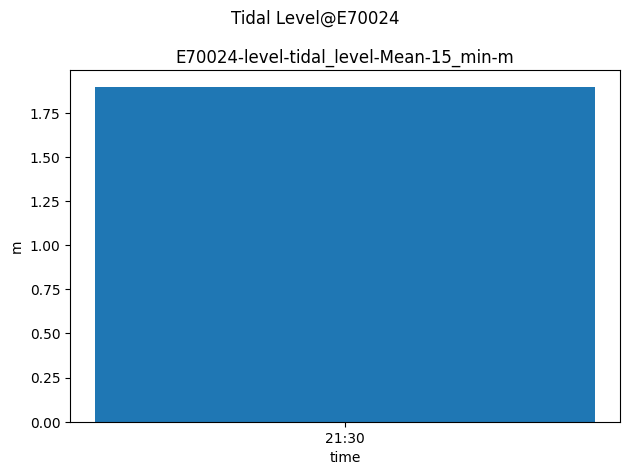

In [22]:
fig, ax = tidal_level_station.plot_data() 

### `plot_data_range()`

`plot_data_range()` unlike `plot_data()` actually requests information from the api. It retrieves all readings for all of the measures defined in  `tidal_level_station.measures` over the date range specified. Similar to `plot_data()` we only plot measures with readings available and if no readings are available then an error will be raised. 

If no date range is passed to the function then all of the readings for the current day are plotted. 

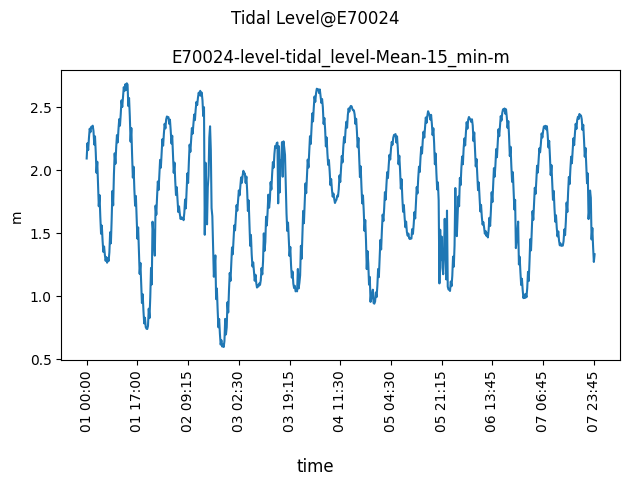

In [24]:
fig, ax = tidal_level_station.plot_data_range(['2025-06-01', '2025-06-07']) 
fig.tight_layout() 

Similar to `plot_data` the only difference between callling `plot_data_range()` with the generic station object and a particular measure station subclass, is that the measure stations name printed at the top and only the measures releveant to the particular station type are plotted. 

### `get_readings()`

There is no difference betwene how get readings works between a measure station like `TidalLevel` or the base `station` class. 

# calling measure station specific methods and attributes 

### `calculate_tidal_range()` 

this is a method which extends the functionality of the `TidalLevel` station class, it takes in one optional argument which is a date range which you wish the tidal range to be calculated over, if this is not provided then the tidal range for the current day will be calculated. 

calculating the tidal range for the current day 

In [35]:
tidal_level_station.calculate_tidal_range() 

1.4389999999999998

calculating the tidal range within a specified date range 

In [38]:
tidal_level_station.calculate_tidal_range(('2025-06-05', '2025-06-07'))

1.5090000000000003

### `average_temp()`

This is a method which extends the functionality of the `Temperature` station class, similar to `calculate_tidal_range()` it takes one optional argumenet which is a date range and if this not specified then the default date range is simply the current day. 

Initialising a temperature station object 

In [39]:
from flood_monitoring import Temperature

In [40]:
temperature_station=Temperature('1412') 

calculating the average temperature for the current day 

In [41]:
temperature_station.average_temp() 

10.91818181818182

calculating the average temperature over a date range 

In [43]:
temperature_station.average_temp(('2025-06-04', '2025-06-07')) 

11.530208333333334

### `in_flood` 

`in_flood` is an attribute of the `RiverLevel` class, which indicates whether or not the current station is in flood. 

In [44]:
from flood_monitoring import RiverLevel 

In [45]:
river_level_station = RiverLevel('F1906') 

Accessing the value of `in_flood` 

In [46]:
river_level_station.in_flood 

True

`in_flood` is a read-only attribute without a setter method 

In [47]:
river_level_station.in_flood = False 

AttributeError: can't set attribute 'in_flood'